In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime, timedelta
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
dataset = pd.read_csv('Nat_Gas.csv')
dataset['Dates'] = pd.to_datetime(dataset['Dates'])
dataset.set_index('Dates', inplace=True)

<ipython-input-2-0bfe62f53db0>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['Dates'] = pd.to_datetime(dataset['Dates'])


In [ ]:
print(dataset)

            Prices
Dates             
2020-10-31   10.10
2020-11-30   10.30
2020-12-31   11.00
2021-01-31   10.90
2021-02-28   10.90
2021-03-31   10.90
2021-04-30   10.40
2021-05-31    9.84
2021-06-30   10.00
2021-07-31   10.10
2021-08-31   10.30
2021-09-30   10.20
2021-10-31   10.10
2021-11-30   11.20
2021-12-31   11.40
2022-01-31   11.50
2022-02-28   11.80
2022-03-31   11.50
2022-04-30   10.70
2022-05-31   10.70
2022-06-30   10.40
2022-07-31   10.50
2022-08-31   10.40
2022-09-30   10.80
2022-10-31   11.00
2022-11-30   11.60
2022-12-31   11.60
2023-01-31   12.10
2023-02-28   11.70
2023-03-31   12.00
2023-04-30   11.50
2023-05-31   11.20
2023-06-30   10.90
2023-07-31   11.40
2023-08-31   11.10
2023-09-30   11.50
2023-10-31   11.80
2023-11-30   12.20
2023-12-31   12.80
2024-01-31   12.60
2024-02-29   12.40
2024-03-31   12.70
2024-04-30   12.10
2024-05-31   11.40
2024-06-30   11.50
2024-07-31   11.60
2024-08-31   11.50
2024-09-30   11.80


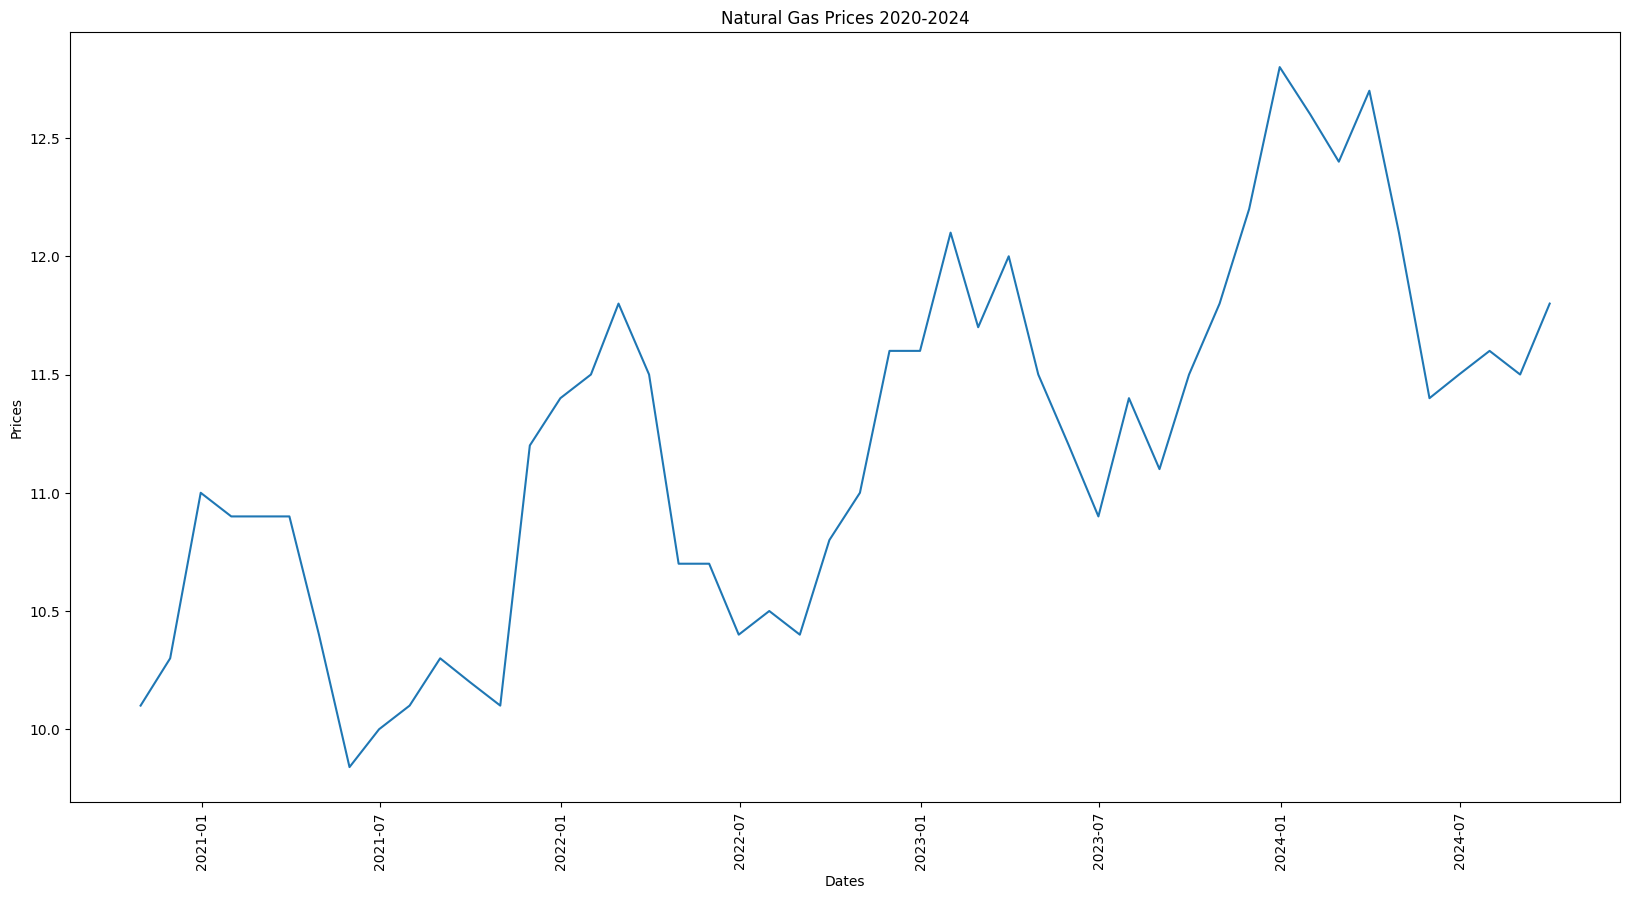

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(dataset['Prices'])
plt.title('Natural Gas Prices 2020-2024')
plt.xlabel('Dates')
plt.xticks(rotation=90)
plt.ylabel('Prices')
plt.show()

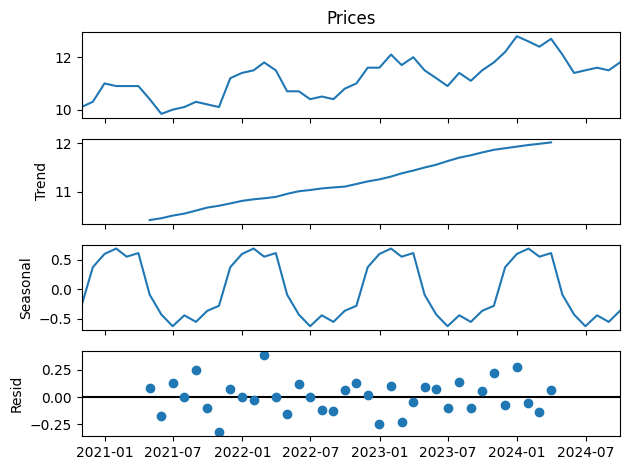

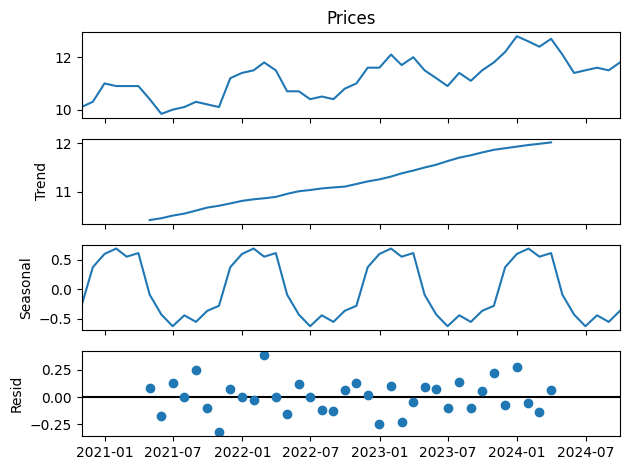

In [ ]:
seasonal_result = seasonal_decompose(dataset['Prices'], model='additive', period=12)
seasonal_result.plot()

In [ ]:
result = adfuller(dataset['Prices'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"critical values: {result[4]}")

ADF Statistic: 0.21807686169999427
p-value: 0.973257438844869
critical values: {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}


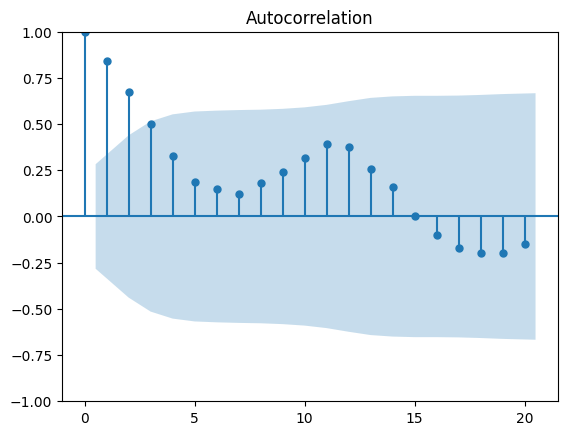

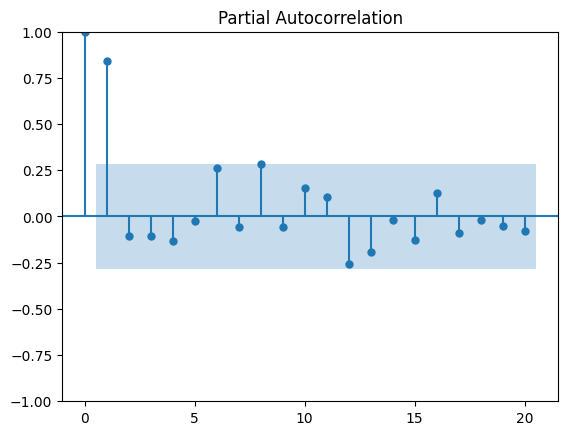

In [ ]:
plot_acf(dataset['Prices'], lags=20)
plt.show()


plot_pacf(dataset['Prices'], lags=20)
plt.show()

In [ ]:
dataset_diff = dataset.diff().dropna()
print(dataset_diff)

            Prices
Dates             
2020-11-30    0.20
2020-12-31    0.70
2021-01-31   -0.10
2021-02-28    0.00
2021-03-31    0.00
2021-04-30   -0.50
2021-05-31   -0.56
2021-06-30    0.16
2021-07-31    0.10
2021-08-31    0.20
2021-09-30   -0.10
2021-10-31   -0.10
2021-11-30    1.10
2021-12-31    0.20
2022-01-31    0.10
2022-02-28    0.30
2022-03-31   -0.30
2022-04-30   -0.80
2022-05-31    0.00
2022-06-30   -0.30
2022-07-31    0.10
2022-08-31   -0.10
2022-09-30    0.40
2022-10-31    0.20
2022-11-30    0.60
2022-12-31    0.00
2023-01-31    0.50
2023-02-28   -0.40
2023-03-31    0.30
2023-04-30   -0.50
2023-05-31   -0.30
2023-06-30   -0.30
2023-07-31    0.50
2023-08-31   -0.30
2023-09-30    0.40
2023-10-31    0.30
2023-11-30    0.40
2023-12-31    0.60
2024-01-31   -0.20
2024-02-29   -0.20
2024-03-31    0.30
2024-04-30   -0.60
2024-05-31   -0.70
2024-06-30    0.10
2024-07-31    0.10
2024-08-31   -0.10
2024-09-30    0.30


In [ ]:
result = adfuller(dataset_diff['Prices'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"critical values: {result[4]}")

ADF Statistic: -6.844773557477344
p-value: 1.754169685294091e-09
critical values: {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}


In [ ]:
model = SARIMAX(dataset['Prices'], order=(2,1,1),seasonal_order=(1,1,1,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             Prices   No. Observations:                   48
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  -0.301
Date:                            Thu, 09 Jan 2025   AIC                             12.603
Time:                                    18:50:08   BIC                             21.935
Sample:                                10-31-2020   HQIC                            15.824
                                     - 09-30-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4305      0.320     -1.344      0.179      -1.059       0.198
ar.L2         -0.2254      0.268   

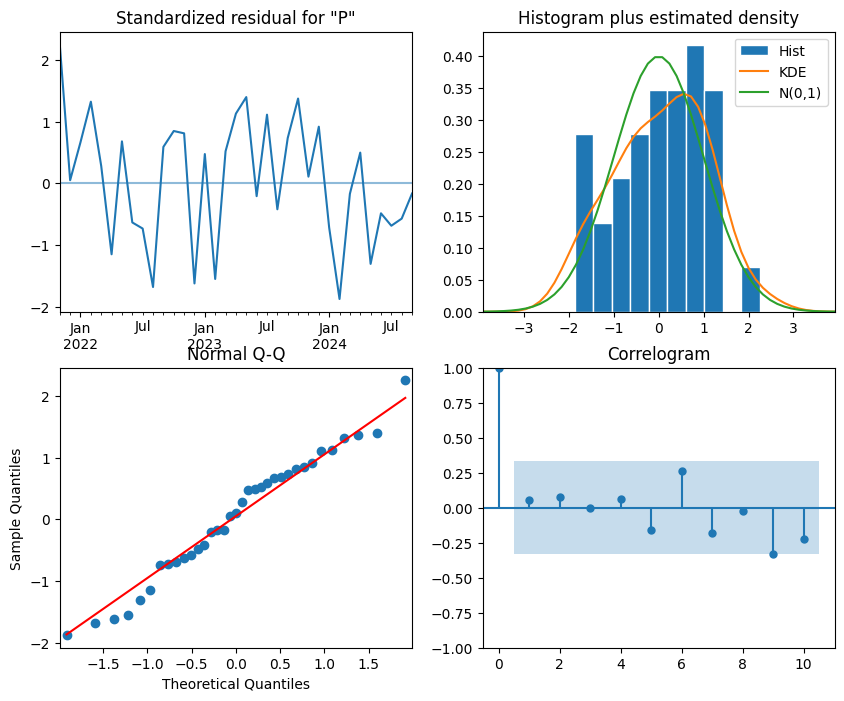

In [ ]:
insights = model.fit()
print(insights.summary())
insights.plot_diagnostics(figsize=(10, 8))
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


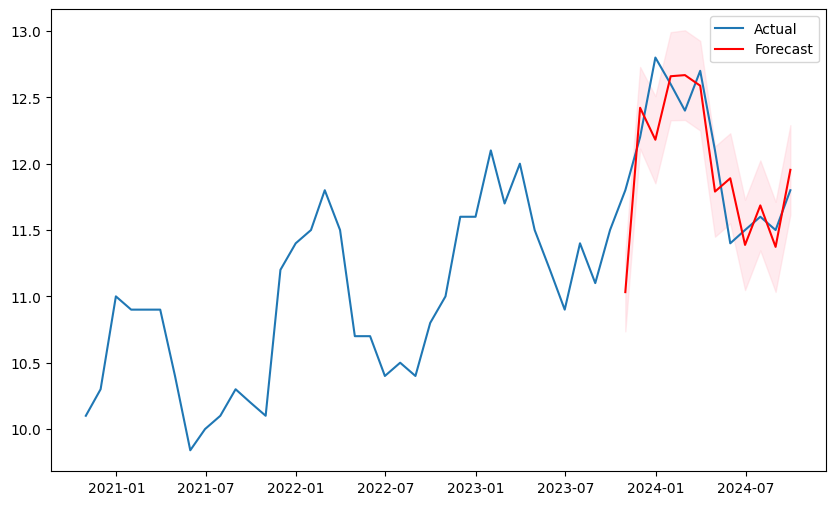

In [ ]:
train = dataset.iloc[:-12]
test = dataset.iloc[-12:]

model = SARIMAX(train, order=(2, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()
forecast = results.get_forecast(steps=12)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()
plt.figure(figsize=(10, 6))
plt.plot(dataset.index, dataset, label='Actual')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='red')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

In [ ]:
mae = mean_absolute_error(test, forecast_values)
rmse = np.sqrt(mean_squared_error(test, forecast_values))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAE: 0.27722093281733323
RMSE: 0.3543053553411307


In [ ]:
forecast = insights.get_forecast(steps=12)
future_dates = pd.date_range(start=dataset.index.max() + timedelta(days=1), periods=12, freq="ME")
future_prices = forecast.predicted_mean
future_prices_df = pd.DataFrame({"Dates": future_dates, "Prices": future_prices})
future_prices_df.set_index("Dates", inplace=True)



print("\nFuture Price Predictions:")
print(future_prices_df)


Future Price Predictions:
               Prices
Dates                
2024-10-31  11.957590
2024-11-30  12.564577
2024-12-31  12.891602
2025-01-31  13.025450
2025-02-28  12.968817
2025-03-31  13.005653
2025-04-30  12.402120
2025-05-31  12.075426
2025-06-30  11.947047
2025-07-31  12.172875
2025-08-31  12.082040
2025-09-30  12.340961


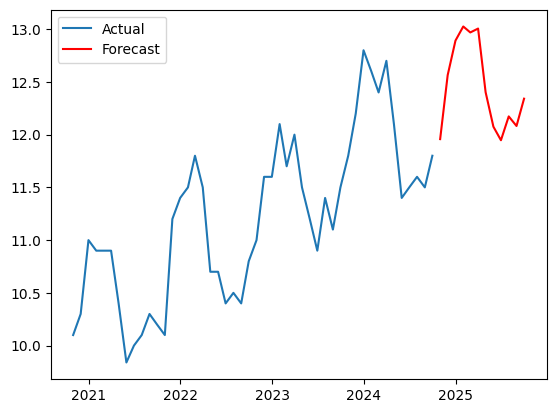

In [ ]:
plt.plot(dataset.index, dataset, label='Actual')
plt.plot(future_prices_df.index, future_prices_df, label='Forecast', color='red')
plt.legend()
plt.show()

In [ ]:

def predict_price(date_input):
  date_input = pd.to_datetime(date_input)
  date_input = date_input +pd.offsets.MonthEnd(0)
  if date_input < dataset.index.min():
    return "Date is before the dataset's start date."
  elif date_input <= dataset.index.max():
    forecasted_price = insights.get_prediction(start=date_input,end=date_input).predicted_mean.iloc[0]
    return f"The predicted price for {date_input.date()} is {forecasted_price:.2f}"
  else:
    steps =(date_input-dataset.index.max()).days//30
    forecasted_price = insights.get_forecast(steps=steps).predicted_mean.iloc[-1]

  return f"The predicted price for {date_input.date()} is {forecasted_price:.2f}."


print(predict_price('2022-10-21'))
print(predict_price('2026-10-21'))

The predicted price for 2022-10-31 is 10.79
The predicted price for 2026-10-31 is 13.03.


In [ ]:
future_prices_df['Prices'] = future_prices_df['Prices'].round(2)
dataset_updated = pd.concat([dataset, future_prices_df])

In [ ]:
inj = dataset_updated.index[0:12]
out = dataset_updated.index[-12:]
# print(inj)
# print(out)
print(inj-out)
print(dataset_updated.loc[out])

TimedeltaIndex(['-1461 days', '-1461 days', '-1461 days', '-1461 days',
                '-1461 days', '-1461 days', '-1461 days', '-1461 days',
                '-1461 days', '-1461 days', '-1461 days', '-1461 days'],
               dtype='timedelta64[ns]', name='Dates', freq=None)
            Prices
Dates             
2024-10-31   11.96
2024-10-31   11.96
2024-11-30   12.56
2024-11-30   12.56
2024-12-31   12.89
2024-12-31   12.89
2025-01-31   13.03
2025-01-31   13.03
2025-02-28   12.97
2025-02-28   12.97
2025-03-31   13.01
2025-03-31   13.01
2025-04-30   12.40
2025-04-30   12.40
2025-05-31   12.08
2025-05-31   12.08
2025-06-30   11.95
2025-06-30   11.95
2025-07-31   12.17
2025-07-31   12.17
2025-08-31   12.08
2025-08-31   12.08
2025-09-30   12.34
2025-09-30   12.34


In [ ]:
# I have written injection withdrawn rate as transaction rate under the consideration that two transactions i.e injection rate and withdrawal rates will needed to be take into account when calculating value of contract
# Another Assumption is that max volume  represents the amount being traded
# Therefore the Transaction Rate calculated is per MMBtu


def month_diff(i,j):
  return (j.year-i.year)*12 +(j.month-i.month)



def value_of_contract(injection_dates,withdrawal_dates,pricing,transaction_rate,max_volume,storage_cost):
    """
      Calculate the value of contracts for given injection and withdrawal dates.

      Args:
          injection_dates (list): List of injection dates.
          withdrawal_dates (list): List of withdrawal dates.
          pricing (pd.DataFrame): DataFrame containing price data.
          transaction_rate (float): Rate for injection/withdrawal transactions per MMBtu.
          max_volume (float): Maximum volume to be traded in MMBtu.
          storage_cost (float): Monthly storage cost.

      Returns:
          dict: Dictionary where keys are (injection_date, withdrawal_date) pairs and values are contract values.
      """
    injection = dict(zip(injection_dates,pricing.loc[injection_dates,'Prices'].to_numpy()))

    withdrawal = dict(zip(withdrawal_dates,pricing.loc[withdrawal_dates,'Prices'].to_numpy()))
    price_difference = {
    (i, j): (withdrawal[j] - injection[i])*max_volume -storage_cost*month_diff(i,j)-2*transaction_rate*max_volume
    for i in injection.keys()
    for j in withdrawal.keys()
    if i<j
    }
    if not price_difference:
      print("No valid injection and withdrawal pairs found. Please revise the input dates.")
      return
    return price_difference




def test():
  transaction_rate = float(input("Enter Transation Rate: "))
  max_volume = float(input("Enter Max Capacity in MMBtu: "))
  storage_cost = float(input("Enter Storage Cost:"))



  print("For entirity of 2020-2025:")
  inj = dataset_updated.index
  price_difference = value_of_contract(inj,inj,dataset_updated,transaction_rate,max_volume,storage_cost)

  # for i,j in price_difference.items():
  #   print(f"The Value of Contract for the Period {pd.to_datetime(i[0]).strftime('%Y-%m-%d')} to {pd.to_datetime(i[1]).strftime('%Y-%m-%d')} with a monthly difference of {month_diff(i[0],i[1])} is {j:.2f}")

  max_value_dates = max(price_difference, key=price_difference.get)
  print(f"Maximum Value of Contract of {max(price_difference.values()):.2f} can be achieved by buying at {max_value_dates[0]} and selling at {max_value_dates[1]}")
  print("\n\nBreakdown:")
  print(f"Price at {max_value_dates[0]} : {dataset_updated.loc[max_value_dates[0],'Prices']:.2f}")
  print(f"Price at {max_value_dates[1]} : {dataset_updated.loc[max_value_dates[1],'Prices']:.2f}")
  print(f"Price difference = {(dataset_updated.loc[max_value_dates[1],'Prices']-dataset_updated.loc[max_value_dates[0],'Prices'])*max_volume}")
  pd = (dataset_updated.loc[max_value_dates[1],'Prices']-dataset_updated.loc[max_value_dates[0],'Prices'])*max_volume
  print(f"\nMonth difference = {month_diff(max_value_dates[0],max_value_dates[1])}")
  print(f"Storage Cost for said months = {month_diff(max_value_dates[0],max_value_dates[1])*storage_cost}")
  sc = month_diff(max_value_dates[0],max_value_dates[1])*storage_cost
  print(f"\nTransaction Cost for both injectioin and withdrawal = {2*transaction_rate*max_volume}")
  tc = 2*transaction_rate*max_volume
  print(f"Total value = {(pd-sc-tc):.2f}")


test()



Enter Transation Rate: 0.01
Enter Max Capacity in MMBtu: 1000000
Enter Storage Cost:100000
For entirity of 2020-2025:
Maximum Value of Contract of 1280000.00 can be achieved by buying at 2021-10-31 00:00:00 and selling at 2022-02-28 00:00:00


Breakdown:
Price at 2021-10-31 00:00:00 : 10.10
Price at 2022-02-28 00:00:00 : 11.80
Price difference = 1700000.0000000012

Month difference = 4
Storage Cost for said months = 400000.0

Transaction Cost for both injectioin and withdrawal = 20000.0
Total value = 1280000.00
